In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
df = pd.read_csv("Fire_Open_Data.csv", parse_dates=['DATE', 'CREATE', 'DISPATCH', 'ENROUTE', 'ARRIVE', 'CLEAR'])

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167586 entries, 0 to 167585
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   AGENCY_NAME      167586 non-null  object        
 1   DATE             167586 non-null  datetime64[ns]
 2   CREATE           167586 non-null  datetime64[ns]
 3   DISPATCH         163462 non-null  datetime64[ns]
 4   ENROUTE          137938 non-null  datetime64[ns]
 5   ARRIVE           147646 non-null  datetime64[ns]
 6   CLEAR            167586 non-null  datetime64[ns]
 7   HOUR OF          167586 non-null  int64         
 8   LOCATION         167584 non-null  object        
 9   EVENT TYPE       167586 non-null  object        
 10  PRIORITY         167586 non-null  int64         
 11  FD EVENT NUMBER  167586 non-null  object        
 12  ZIP_CODE         166968 non-null  float64       
dtypes: datetime64[ns](6), float64(1), int64(2), object(4)
memory usage: 16.6+ 

In [195]:
df.shape

(167586, 13)

### Making all Agencies and Event Types dummies

In [175]:
##dummy_agency = pd.get_dummies(df['AGENCY_NAME'], prefix="Agency") #Create Dummy Variable for the Agency Names
##df = pd.concat([df, dummy_agency], axis=1) # Concat original dummy vars
## df= df.drop('AGENCY_NAME', axis=1) # Drops OG column

In [176]:
# Checking it worked
##first_agency_column = df.columns[df.loc[0] == 1][0]

##print("Agency of the first row:", first_agency_column)

Agency of the first row: Agency_Fern Creek FD


In [177]:
##dummy_event = pd.get_dummies(df['EVENT TYPE'].str.replace(' ','_'), prefix='Event_Type')  # Create Dummy Variable for the Event Types
##df = pd.concat([df, dummy_event], axis=1) # concat original dummy vars
# df = df.drop('EVENT TYPE', axis=1) #Drops OG col


In [200]:
# Display each column name (too many cols, so we have to print them out individually)
##column_names = df.columns
##print("Column Names:")
##for col_name in column_names:
##    print(col_name)

Column Names:
AGENCY_NAME
DATE
CREATE
DISPATCH
ENROUTE
ARRIVE
CLEAR
HOUR_OF
EVENT TYPE
PRIORITY
Response_Time


### Further Cleaning

In [197]:
df = df.rename(columns={'HOUR OF': 'HOUR_OF'})

In [198]:
#Dropping the unused Columns
df.drop(['LOCATION'], axis=1, inplace=True)
df.drop(['FD EVENT NUMBER'], axis=1, inplace=True)
df.drop(['ZIP_CODE'], axis=1, inplace=True)

In [199]:
# adding a column for total response time (disbatch to arrive)
df['Response_Time'] = (df['ARRIVE'] - df['DISPATCH']).dt.total_seconds()

### Checking For NaN values in each column

In [201]:
# Print NaN precentages for all cols
for column_name in df.columns:
    nan_percentage = (df[column_name].isna().sum() / len(df[column_name])) * 100
    print(nan_percentage)

0.0
0.0
0.0
2.460826083324383
17.691215256644348
11.89836859880897
0.0
0.0
0.0
0.0
11.89836859880897


### Summary Stats

In [202]:
df.describe()

,HOUR_OF,PRIORITY,Response_Time
count,167586.000000,167586.000000,147646.000000
mean,1308.261430,5.144851,48.025114
std,621.016167,2.466530,4713.930797
min,0.000000,0.000000,-86270.000000
25%,900.000000,2.000000,217.000000
50%,1400.000000,7.000000,283.000000
75%,1800.000000,7.000000,367.000000
max,2300.000000,9.000000,6310.000000


In [203]:
df.head()

,AGENCY_NAME,DATE,CREATE,DISPATCH,ENROUTE,ARRIVE,CLEAR,HOUR_OF,EVENT TYPE,PRIORITY,Response_Time
0,Fern Creek FD,2021-03-01,2024-02-06 00:22:43,2024-02-06 00:22:59,2024-02-06 00:26:15,NaT,2024-02-06 00:26:31,0,MEDICAL--MEDICAL - MED_CALL,7,NaN
1,Middletown FD,2021-03-01,2024-02-06 00:33:52,2024-02-06 00:34:19,NaT,2024-02-06 00:40:17,2024-02-06 00:51:04,0,WIRES_DOWN--Wires Down - Low Hanging,9,358.0
2,Louisville Fire Department,2021-03-01,2024-02-06 00:47:16,2024-02-06 00:47:42,2024-02-06 00:49:27,NaT,2024-02-06 01:06:21,0,MEDICAL--MEDICAL - MED_CALL,7,NaN
3,Louisville Fire Department,2021-03-01,2024-02-06 00:53:43,2024-02-06 00:54:06,2024-02-06 00:56:13,2024-02-06 01:06:34,2024-02-06 01:08:23,0,MEDICAL--MEDICAL - MED_CALL,7,748.0
4,Louisville Fire Department,2021-03-01,2024-02-06 01:03:30,2024-02-06 01:03:45,2024-02-06 01:05:30,2024-02-06 01:08:32,2024-02-06 01:27:04,100,MEDICAL--MEDICAL - MED_CALL,7,287.0


In [204]:
df.tail()

,AGENCY_NAME,DATE,CREATE,DISPATCH,ENROUTE,ARRIVE,CLEAR,HOUR_OF,EVENT TYPE,PRIORITY,Response_Time
167581,Louisville Fire Department,2023-02-28,2024-02-06 23:22:23,2024-02-06 23:23:23,2024-02-06 23:24:53,2024-02-06 23:28:06,2024-02-06 23:28:25,2300,MEDICAL--MEDICAL - MED_CALL,7,283.0
167582,Louisville Fire Department,2023-02-28,2024-02-06 23:34:39,NaT,NaT,NaT,2024-02-06 23:35:33,2300,MEDICAL--MEDICAL - MED_CALL,7,NaN
167583,Louisville Fire Department,2023-02-28,2024-02-06 23:40:48,2024-02-06 23:40:57,NaT,2024-02-06 23:40:58,2024-02-06 23:50:05,2300,MEDICAL--MEDICAL - MED_CALL,7,1.0
167584,Louisville Fire Department,2023-02-28,2024-02-06 23:43:25,2024-02-06 23:43:40,2024-02-06 23:45:26,2024-02-06 23:49:36,2024-02-06 00:08:10,2300,MEDICAL--MEDICAL - MED_CALL,7,356.0
167585,Louisville Fire Department,2023-02-28,2024-02-06 23:54:03,2024-02-06 23:54:24,2024-02-06 23:55:48,2024-02-06 23:58:20,2024-02-06 23:59:22,2300,MEDICAL--MEDICAL - MED_CALL,7,236.0


In [205]:
correlation_matrix = df.corr()
correlation_matrix

,HOUR_OF,PRIORITY,Response_Time
HOUR_OF,1.000000,-0.023982,-0.090863
PRIORITY,-0.023982,1.000000,0.003945
Response_Time,-0.090863,0.003945,1.000000


In [206]:
column_to_analyze = 'PRIORITY'
frequency_distribution = df[column_to_analyze].value_counts()
proportions = df[column_to_analyze].value_counts(normalize=True)

In [207]:
frequency_distribution # Show how many times a priority level was picked

7    95282
2    41612
3    10468
1     9774
8     5261
4     2110
5     1848
9     1229
0        2
Name: PRIORITY, dtype: int64

In [208]:
proportions                    #Same as frequency, but part of whole

7    0.568556
2    0.248302
3    0.062463
1    0.058322
8    0.031393
4    0.012591
5    0.011027
9    0.007334
0    0.000012
Name: PRIORITY, dtype: float64

<AxesSubplot:xlabel='PRIORITY'>

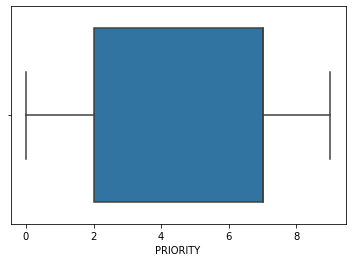

In [209]:
# Shows the possible outliers
numeric_column_to_analyze = 'PRIORITY'
sns.boxplot(x=df[numeric_column_to_analyze])

In [191]:
df.to_csv('FireDataEDA.csv', index=False)